In [7]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [101]:
class monkey():
  def __init__(self, items, expression, test, true_monkey, false_monkey):
    self.items = items
    self.expression = expression
    self.test = test
    self.true_monkey = true_monkey
    self.false_monkey = false_monkey
    self.n_inspect= 0
    
  def operation(self, old):
    new = eval(self.expression)
    return new
  
  def get_bored(self, old):
    new = int(old/3)
    return new
  
  def test_worry(self, item):
    return (item % self.test) == 0
  
  def inspect_items(self):
    
    actions = []
    for i in range(len(self.items)):
      self.n_inspect += 1
      self.items[i] = self.operation(self.items[i])
      self.items[i] = self.get_bored(self.items[i])
      if self.test_worry(self.items[i]):
        actions.append((self.items[i], self.true_monkey))
        #self.items.pop(i)
      else:
        actions.append((self.items[i], self.false_monkey))
        #self.items.pop(i)
    self.items=[]  
    return actions
        
  def catch(self, item):
    self.items.append(item)

In [102]:
def play_round(monkey_pack):
  for m in monkey_pack:
    #print(monkey_pack[m].items)
    throws = monkey_pack[m].inspect_items()
    for t in throws:
      monkey_pack[t[1]].catch(t[0])
    #print(monkey_pack[m].items)
    #print(actions)
  return monkey_pack

In [104]:
monkey_pack = {}
start = 0 
with open("11th.txt", "r") as file:
    for i, line in enumerate(file):
      #l = line.strip()
      if line[0:5] == "Monke":
        start = 1
        mnum = int(line.strip().split(" ")[1].split(":")[0])
      elif line == "\n":
        start = 0
      elif start >= 1:
        start += 1
        l = line.strip().split(":")
        if start == 2:
          items = eval("["+l[1]+"]")
        if start == 3:
          exp = l[1].split("= ")[1]
        if start == 4:
          div = int(l[1].split("by ")[1])
        if start == 5:
          tm = int(l[1].split("monkey ")[1])
        if start == 6:
          fm = int(l[1].split("monkey ")[1])
          m = monkey(items, exp, div, tm, fm)
          monkey_pack[mnum] = m
          #print(start, items, exp, div, tm, fm)
      #print(start)
monkey_pack

{0: <__main__.monkey at 0x1117cb070>,
 1: <__main__.monkey at 0x1117c8a90>,
 2: <__main__.monkey at 0x111773310>,
 3: <__main__.monkey at 0x1117c95d0>,
 4: <__main__.monkey at 0x111773d90>,
 5: <__main__.monkey at 0x111773eb0>,
 6: <__main__.monkey at 0x1117ca0e0>,
 7: <__main__.monkey at 0x111773f10>}

In [105]:
for i in range(20):
  monkey_pack = play_round(monkey_pack)
active_guys = []
for m in monkey_pack:
  print("m", m, monkey_pack[m].items, monkey_pack[m].n_inspect)
  active_guys.append(monkey_pack[m].n_inspect)
active_guys.sort()
print(active_guys)
print(active_guys[-1]*active_guys[-2])

m 0 [9, 9, 9, 9, 9, 26, 26, 26, 119219, 7] 208
m 1 [11, 11, 11, 21, 21] 108
m 2 [17, 17, 17, 17, 17] 60
m 3 [] 103
m 4 [3, 4, 4, 4, 4, 4, 4, 8394, 13, 13] 255
m 5 [6, 6, 6, 33, 33, 33] 202
m 6 [] 266
m 7 [] 179
[60, 103, 108, 179, 202, 208, 255, 266]
67830


# Solution 2

In [2]:
(6*1)%2

0

In [3]:
monkey_pack[m].expression.split(" ")[1]

NameError: name 'monkey_pack' is not defined

In [ ]:
print([(7*7)%i for i in range(1,10)])
print([(7)%i for i in range(1,10)])

In [22]:

class monkey():
  def __init__(self, items, expression, test, true_monkey, false_monkey):
    self.items = items
    self.expression = expression
    self.test = test
    self.true_monkey = true_monkey
    self.false_monkey = false_monkey
    self.n_inspect= 0
    self.lcm = 0

  def get_bored(self, old):
    new = old % self.lcm
    return new
    
  def operation(self, old):
    new = eval(self.expression)
    return new
  
  def test_worry(self, item):
    return (item % self.test) == 0
  
  def inspect_items(self):
    actions = []
    for i in range(len(self.items)):
      self.n_inspect += 1
      self.items[i] = self.operation(self.items[i])
      self.items[i] = self.get_bored(self.items[i])
      if self.test_worry(self.items[i]):
        actions.append((self.items[i], self.true_monkey))
        #self.items.pop(i)
      else:
        actions.append((self.items[i], self.false_monkey))
        #self.items.pop(i)
    self.items=[]  
    return actions

  def inspect_items_and_time(self):
    actions = []
    for i in range(len(self.items)):
      self.n_inspect += 1
      t1 = datetime.now()
      self.items[i] = self.operation(self.items[i])
      t2 = datetime.now()
      print("self.operation", t2- t1)
      t1 = datetime.now()
      if self.test_worry(self.items[i]):
        actions.append((self.items[i], self.true_monkey))
        #self.items.pop(i)
      else:
        actions.append((self.items[i], self.false_monkey))
        #self.items.pop(i)
      t2 = datetime.now()
      print("self.test", t2- t1)
    self.items=[]  
    return actions
  
  
  def catch(self, item):
    self.items.append(item)

In [27]:
monkey_pack = {}
start = 0 
lcm_l = []
with open("11th.txt", "r") as file:
    for i, line in enumerate(file):
      #l = line.strip()
      if line[0:5] == "Monke":
        start = 1
        mnum = int(line.strip().split(" ")[1].split(":")[0])
      elif line == "\n":
        start = 0
      elif start >= 1:
        start += 1
        l = line.strip().split(":")
        if start == 2:
          items = eval("["+l[1]+"]")
        if start == 3:
          exp = l[1].split("= ")[1]
        if start == 4:
          div = int(l[1].split("by ")[1])
          lcm_l.append(div)
        if start == 5:
          tm = int(l[1].split("monkey ")[1])
        if start == 6:
          fm = int(l[1].split("monkey ")[1])
          m = monkey(items, exp, div, tm, fm)
          monkey_pack[mnum] = m
          #print(start, items, exp, div, tm, fm)
      #print(start)
monkey_pack

{0: <__main__.monkey at 0x10eb66d10>,
 1: <__main__.monkey at 0x10e864a00>,
 2: <__main__.monkey at 0x10eb82470>,
 3: <__main__.monkey at 0x10e8af070>,
 4: <__main__.monkey at 0x10eb821d0>,
 5: <__main__.monkey at 0x10ea57f10>,
 6: <__main__.monkey at 0x10eb803d0>,
 7: <__main__.monkey at 0x10ea57f70>}

In [28]:
lcm_l

[3, 11, 7, 2, 19, 5, 17, 13]

In [29]:
for m in monkey_pack:
  monkey_pack[m].lcm = np.prod(lcm_l)

In [30]:
for i in range(10000):
  monkey_pack = play_round(monkey_pack)
active_guys = []
for m in monkey_pack:
  print("m", m, monkey_pack[m].items, monkey_pack[m].n_inspect)
  active_guys.append(monkey_pack[m].n_inspect)
active_guys.sort()
print(active_guys)
print(active_guys[-1]*active_guys[-2])

m 0 [3255778, 4300003, 4578463, 3139753, 262333, 507949, 507949, 2575693, 6932640, 5616687, 4874756, 8773196] 120951
m 1 [5822359, 518053, 518053] 16092
m 2 [3575287] 6543
m 3 [6036082] 28995
m 4 [8008871, 7776821, 2068391, 8844251, 1922021, 1922021, 8563709, 30041] 126542
m 5 [165574, 3599914, 4249654, 6662974, 6201016, 6201016, 1922014, 1040224, 8865664, 3137956, 736655] 119627
m 6 [] 120399
m 7 [] 105570
[6543, 16092, 28995, 105570, 119627, 120399, 120951, 126542]
15305381442


In [10]:
def play_round(monkey_pack):
  for m in monkey_pack:
    #print(monkey_pack[m].items)
    throws = monkey_pack[m].inspect_items()
    
    for t in throws:
      monkey_pack[t[1]].catch(t[0])
    #print(monkey_pack[m].items)
    #print(actions)
  return monkey_pack

In [197]:
from datetime import datetime

In [198]:
def play_round_t(monkey_pack):
  for m in monkey_pack:
    #print(monkey_pack[m].items)
    throws = monkey_pack[m].inspect_items_and_time()
    t1 = datetime.now()
    for t in throws:
      monkey_pack[t[1]].catch(t[0])
    t2 = datetime.now()
    print("throws", t2- t1)
    #print(monkey_pack[m].items)
    #print(actions)
  return monkey_pack

In [146]:
a = 0

In [147]:
(t2-t1).total_seconds()

-2e-06

In [148]:
times = []
for i in range(685):
  a += 1
  t1 = datetime.now()
  monkey_pack = play_round(monkey_pack)
  t2 = datetime.now()
  times.append((t2-t1).total_seconds())

#t1 = datetime.now()
#monkey_pack = play_round_t(monkey_pack)
#t2 = datetime.now()
#times.append((t2-t1).total_seconds())


In [120]:
m = 0
len(monkey_pack[m].items)

5

In [119]:
monkey_pack[m].items[0]>1

True

In [121]:
aaa = str(monkey_pack[m].items[0])

In [124]:
aaa

'4'

In [123]:
len(aaa)

1178255

In [ ]:
  for m in monkey_pack:
    #print(monkey_pack[m].items)
    throws = monkey_pack[m].inspect_items_and_time()
    t1 = datetime.now()
    for t in throws:
      monkey_pack[t[1]].catch(t[0])
    t2 = datetime.now()
    print("throws", t2- t1)

In [82]:
times[686]

IndexError: list index out of range

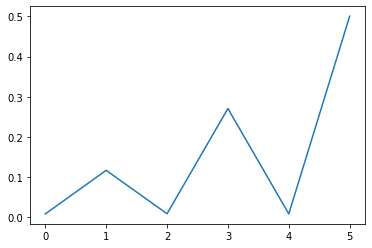

In [80]:
plt.plot(times[680:])

In [9]:
monkey_pack

{0: <__main__.monkey at 0x10f020e80>,
 1: <__main__.monkey at 0x10f023bb0>,
 2: <__main__.monkey at 0x10f023ac0>,
 3: <__main__.monkey at 0x10f023b20>}

In [10]:
for m in monkey_pack:
  print("m", m, monkey_pack[m].items, monkey_pack[m].n_inspect)

m 0 [3234458218697420724264379222235508184576415261503676097228179117573169921920160408625797982966050332412374274613728044693468762649037425623773572058950701247818922767947698157473415063444507100287354250287930060728763215139019798803134209673320376567134360415805509081249329487591543925505464935059930017079956841618303481165236894907824637586675085493998087338, 19010305820623524976587817623615570176776697393806378950786468142876959675800765262589262785820211652569311096386094055718390137993705817909839632541919721307590048170840180600120352575167442, 52101332505875765640994157315015170444087996992887004100058971270425396090546009826853520314585145238112200031342931284408072394561723118825941727719609128354768151949102375026194184668588263432662411973667249527768751377885093333727844653190997022417805200930768128924172913823446426304404634721409205664163706493974150, 205631388646040010356708591115082546132727965919626346256764936371109230001318336728305477804187964032131049812136740

In [12]:
%%timeit
old = 10
eval("old * 5")

5.02 µs ± 60.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [13]:
%%timeit
old = 1847031547338206726480034204678119581674615483140963947944976518982409077477850228110734890713752950795634457713232193444217320585647253845261241382961000213022726400363450272835272087770615143739105630203253363
eval("old * 5")

5.22 µs ± 41.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [83]:
%%timeit
old = 184703154733820672648003420467811958167461548314096394794497651898240907747785022811073489071375295079563445771323219344421732058564725384526124138296100021302272640036345027283527208777061514373910563020325336318470315473382067264800342046781195816746154831409639479449765189824090774778502281107348907137529507956344577132321934442173205856472538452612413829610002130227264003634502728352720877706151437391056302032533631847031547338206726480034204678119581674615483140963947944976518982409077477850228110734890713752950795634457713232193444217320585647253845261241382961000213022726400363450272835272087770615143739105630203253363184703154733820672648003420467811958167461548314096394794497651898240907747785022811073489071375295079563445771323219344421732058564725384526124138296100021302272640036345027283527208777061514373910563020325336318470315473382067264800342046781195816746154831409639479449765189824090774778502281107348907137529507956344577132321934442173205856472538452612413829610002130227264003634502728352720877706151437391056302032533631847031547338206726480034204678119581674615483140963947944976518982409077477850228110734890713752950795634457713232193444217320585647253845261241382961000213022726400363450272835272087770615143739105630203253363
eval("old * 5")

5.21 µs ± 65.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
